## Preprocessing

In [131]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Build Network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# Load the Keras model from the H5 file
from tensorflow.keras.models import load_model

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [132]:
# Drop the columns with low importance based on Features' Importance:
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [133]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ("T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17")

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [134]:
# Classification count less than 3
classification_count = application_df["CLASSIFICATION"].value_counts()
classification_count1 = classification_count[classification_count < 3]

# Display the result
print(classification_count1)

CLASSIFICATION
C3200    2
C1234    2
C1246    2
C1267    2
C1256    2
C2190    1
C4200    1
C2600    1
C5200    1
C1370    1
C1248    1
C6100    1
C1820    1
C1900    1
C1236    1
C3700    1
C2570    1
C1580    1
C1245    1
C2500    1
C1570    1
C1283    1
C2380    1
C1732    1
C1728    1
C2170    1
C4120    1
C8210    1
C2561    1
C4500    1
C2150    1
Name: count, dtype: int64


In [135]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ("C2190", "C4200", "C2600", "C5200", "C1370", "C1248", "C6100", "C1820", 
                              "C1900", "C1236", "C3700", "C2570", "C1580", "C1245", "C2500", "C1570", 
                              "C1283", "C2380", "C1732", "C1728", "C2170", "C4120", "C8210", "C2561", 
                              "C4500", "C2150", "C3200", "C1246", "C1234", "C1256", "C1267")
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
Other       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C4100        6
C1720        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
Name: count, dtype: int64

In [136]:
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION              41
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [137]:
# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [138]:
# Create OneHotEncoder instance FOR CLASSIFICATION and APPLICATION_TYPE
enc = OneHotEncoder(sparse_output=False)

# Fit and Transform the OneHotEncoder using the categorical list
encode_app_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_app_df.columns = enc.get_feature_names_out(application_cat2)
encode_app_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [139]:
# Merge one-hot-encoded features and drop the originals
application_df = application_df.merge(encode_app_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_features = len(X_train[0])
print(f"Number of features: {X_features}")

Number of features: 78


In [141]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [142]:
best_model = load_model('Resources/model2/AlphabetSoupCharity_Optimization.h5')

# Print the summary of the loaded model
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │         1,422 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,905 (7.45 KB)

 Trainable params: 1,903 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [143]:
model_config = best_model.get_config()

# Print the hyperparameters
for layer in model_config['layers']:
    print(f"Layer: {layer['class_name']}")
    for key, value in layer['config'].items():
        print(f"  {key}: {value}")

Layer: InputLayer
  batch_shape: (None, 78)
  dtype: float32
  sparse: False
  name: input_layer
Layer: Dense
  name: dense
  trainable: True
  dtype: {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}
  units: 18
  activation: relu
  use_bias: True
  kernel_initializer: {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}
  bias_initializer: {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}
  kernel_regularizer: {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.0}, 'registered_name': None}
  bias_regularizer: None
  kernel_constraint: None
  bias_constraint: None
Layer: Dense
  name: dense_1
  trainable: True
  dtype: {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}
  units: 24
  activation: relu
  use_bias: True
  kernel_initializer: {'module': 'ker

In [146]:
# Load the best model
best_model = load_model('Resources/model2/AlphabetSoupCharity_Optimization.h5')

# Print the summary of the loaded model
best_model.summary()

# Ensure the optimizer is properly set
best_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the loaded model on scaled data
history = best_model.fit(X_train_scaled, y_train, 
                         epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model on test data
loss, accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │         1,422 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,905 (7.45 KB)

 Trainable params: 1,903 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7369 - loss: 0.5448 - val_accuracy: 0.7235 - val_loss: 0.5587
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7317 - loss: 0.5508 - val_accuracy: 0.7256 - val_loss: 0.5603
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7319 - loss: 0.5485 - val_accuracy: 0.7247 - val_loss: 0.5571
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7392 - loss: 0.5412 - val_accuracy: 0.7265 - val_loss: 0.5595
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7343 - loss: 0.5464 - val_accuracy: 0.7256 - val_loss: 0.5596
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7364 - loss: 0.5428 - val_accuracy: 0.7275 - val_loss: 0.5583
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5470 - val_accuracy: 0.7263 - val_loss: 0.5560
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7354 - loss: 0.5419 - val_accuracy: 0.

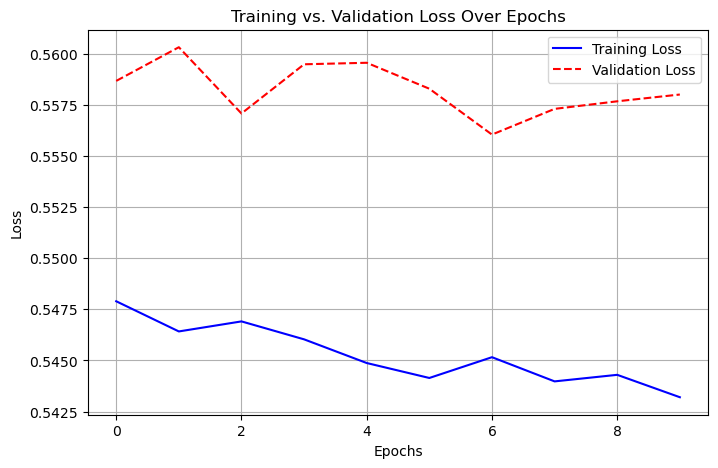

In [148]:
# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss", color='blue', linestyle='-')
plt.plot(val_loss, label="Validation Loss", color='red', linestyle='--')

# Labels & Title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss Over Epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [155]:
# Setting up best_model manually:

def build_model():
    model = Sequential()
    
    # Input Layer
    model.add(Dense(18, activation="relu", kernel_regularizer=l2(0.0), input_shape=(X_train_scaled.shape[1],)))

    # Hidden Layers
    model.add(Dense(24, activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(104, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(48, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(56, activation="relu"))
    model.add(Dropout(0.4))

    model.add(Dense(112, activation="relu"))
    model.add(Dropout(0.4))

    # Output Layer (assuming binary classification)
    model.add(Dense(1, activation="sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Build and summarize the model
model = build_model()
model.summary()


/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 18)             │         1,422 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 24)             │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 104)            │         3,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 48)             │         5,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 56)             │         2,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,391 (79.65 KB)

 Trainable params: 20,391 (79.65 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Build Model
model = build_model()

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights after stopping
)
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=10,
    verbose=1,
)
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6340 - loss: 0.6440 - val_accuracy: 0.7221 - val_loss: 0.5720
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7205 - loss: 0.5776 - val_accuracy: 0.7242 - val_loss: 0.5765
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7324 - loss: 0.5638 - val_accuracy: 0.7250 - val_loss: 0.5681
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7294 - loss: 0.5602 - val_accuracy: 0.7249 - val_loss: 0.5697
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7296 - loss: 0.5615 - val_accuracy: 0.7252 - val_loss: 0.5687
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7343 - loss: 0.5545 - val_accuracy: 0.7259 - val_loss: 0.5599
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7281 - loss: 0.5618 - val_accuracy: 0.7256 - val_loss: 0.5582
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7337 - loss: 0.5524 - val_accuracy: 0.

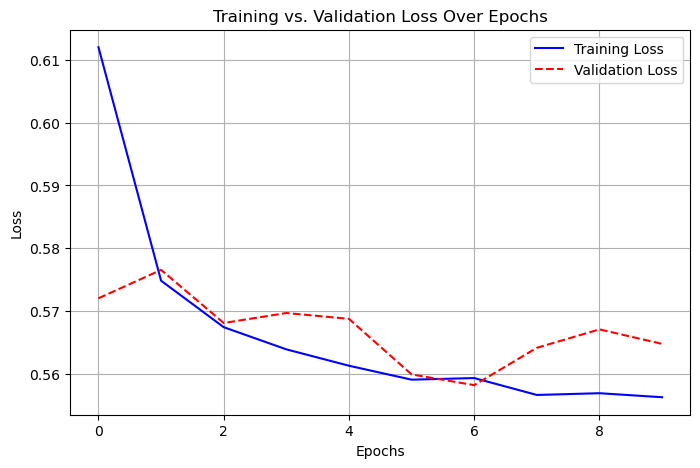

In [157]:
# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss", color='blue', linestyle='-')
plt.plot(val_loss, label="Validation Loss", color='red', linestyle='--')

# Labels & Title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss Over Epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Feature Selection
Removing Features with less than 0.05 importance level resulted in lower accuracy rate. 

In [158]:
# REMOVE ALL FEATURES WITH LESS THAN 0.05
features2=["INCOME_AMT_0", "INCOME_AMT_25000-99999", "INCOME_AMT_1M-5M", "INCOME_AMT_100000-499999", 
           "INCOME_AMT_1-9999", "INCOME_AMT_10M-50M", "INCOME_AMT_10000-24999", "INCOME_AMT_50M+", 
           "INCOME_AMT_5M-10M", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y", "STATUS", 
           "USE_CASE_ProductDev", "USE_CASE_Preservation", "USE_CASE_CommunityServ", "USE_CASE_Heathcare", 
           "USE_CASE_Other"]

application_feat2_df=application_df.drop(columns=features2)
application_feat2_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [159]:
# Split our preprocessed data into our features and target arrays
y = application_feat2_df["IS_SUCCESSFUL"].values
X = application_feat2_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_features = len(X_train[0])
X_features

61

In [160]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [167]:
# Setting up best_model manually:

def create_model():
    model2 = Sequential()
    
    # Input Layer
    model2.add(Dense(18, activation="relu", kernel_regularizer=l2(0.0), input_shape=(61,)))

    # Hidden Layers
    model2.add(Dense(24, activation="relu"))
    model2.add(Dropout(0.1))

    model2.add(Dense(32, activation="relu"))
    model2.add(Dropout(0.1))

    model2.add(Dense(104, activation="relu"))
    model2.add(Dropout(0.2))

    model2.add(Dense(48, activation="relu"))
    model2.add(Dropout(0.4))

    model2.add(Dense(56, activation="relu"))
    model2.add(Dropout(0.4))

    model2.add(Dense(112, activation="relu"))
    model2.add(Dropout(0.4))

    # Output Layer (assuming binary classification)
    model2.add(Dense(1, activation="sigmoid"))

    # Compile Model
    model2.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model2

# Build and summarize the model
model2 = create_model()
model2.summary()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 18)             │         1,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 24)             │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 104)            │         3,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 48)             │         5,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 56)             │         2,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_126 (Dropout)           │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,085 (78.46 KB)

 Trainable params: 20,085 (78.46 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
# Build Model
model2 = create_model()

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights after stopping
)
# Train the Model
history2 = model2.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=10,
    verbose=1,
    callbacks=[early_stopping]
)
loss, accuracy = model2.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6427 - loss: 0.6404 - val_accuracy: 0.7205 - val_loss: 0.5793
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7140 - loss: 0.5861 - val_accuracy: 0.7243 - val_loss: 0.5703
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7238 - loss: 0.5675 - val_accuracy: 0.7217 - val_loss: 0.5694
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7250 - loss: 0.5693 - val_accuracy: 0.7216 - val_loss: 0.5718
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7233 - loss: 0.5730 - val_accuracy: 0.7224 - val_loss: 0.5656
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7268 - loss: 0.5667 - val_accuracy: 0.7227 - val_loss: 0.5675
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7278 - loss: 0.5660 - val_accuracy: 0.7245 - val_loss: 0.5682
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7229 - loss: 0.5698 - val_accuracy: 0.

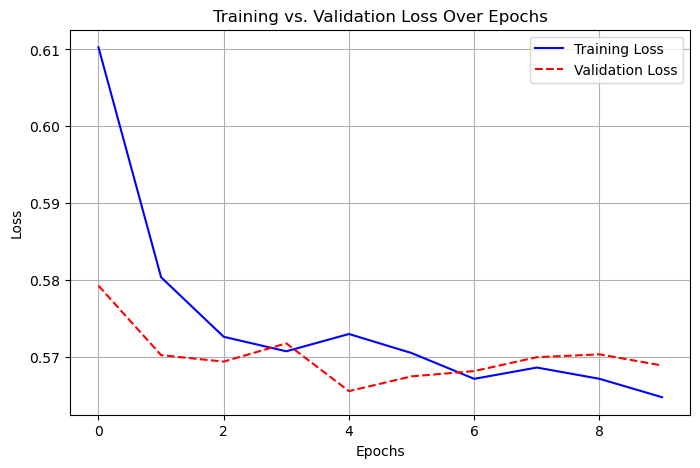

In [169]:
# Extract loss values
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Plot loss vs. epochs
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss", color='blue', linestyle='-')
plt.plot(val_loss, label="Validation Loss", color='red', linestyle='--')

# Labels & Title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss Over Epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()